<a href="https://colab.research.google.com/github/rileyseefeldt/MAT421/blob/main/HW21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 21 Numerical Integration

##21.1 Numerical Integration Problem Statement

Oftentimes real life data is non-continuous and often has intervals or steps where a fucntion is undefined due to many reasons (ie timed sensor readings). Numerical integration is about approximating the integral of these "step" functions to an acceptable level of precision.

##21.2 Riemanns Integral

The easiest way to approximate an integral for "step" functions is to create rectangles with the width (h) of each step in the function.  The height of these rectangles can be determined in three different ways. 1. The value of the function to the left of the gap 2. the value of the funciton to the right of the gap 3. Taking the average of those two values.

The formula for summing up the areas of these rectangles (and finding the value of the integral) is given by:

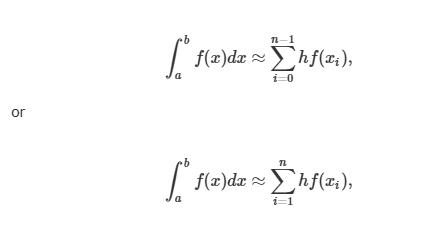

In [8]:
import numpy as np
from scipy.integrate import quad

#function e^(x^2)
def f(x):
    return np.exp(-x**2)  # Function: e^(-x^2)

#bounds
a, b = 0, 1
#num points
n = 11
#step size
h = (b - a) / (n - 1)
#generates n x values
x = np.linspace(a, b, n)
#computes function at those values
f_values = f(x)

#compute rienmann sums
#left sum
I_riemannL = h * np.sum(f_values[:-1])
#right
I_riemannR = h * np.sum(f_values[1:])
#middle
I_mid = h * np.sum(f((x[:-1] + x[1:]) / 2))
#finds exact integral value with library function
exact_integral, _ = quad(f,a,b)

#finds errors between expected and computed values
err_riemannL = exact_integral - I_riemannL
err_riemannR = exact_integral - I_riemannR
err_mid = exact_integral - I_mid

print(f"Exact Integral: {exact_integral:.6f}")
print(f"Left Riemann Sum: {I_riemannL:.6f}, Error: {err_riemannL:.6f}")
print(f"Right Riemann Sum: {I_riemannR:.6f}, Error: {err_riemannR:.6f}")
print(f"Midpoint Riemann Sum: {I_mid:.6f}, Error: {err_mid:.6f}")


Exact Integral: 0.746824
Left Riemann Sum: 0.777817, Error: -0.030993
Right Riemann Sum: 0.714605, Error: 0.032219
Midpoint Riemann Sum: 0.747131, Error: -0.000307


##21.3 Trapezoid Rule

The trapezoid rule aims to approximate the value of an integral using trapezoids for each subinterval instead of rectangles. For each subinteral the trapezoids corners exist at: (xi,0),(xi+1,0),(xi,f(xi)), and (xi+1,f(xi+1)). The formula for summing up all the trapezoids in the function (and finding the value of the integral) is:

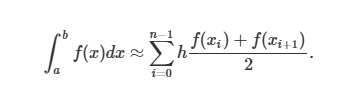

In [9]:
import numpy as np
from scipy.integrate import quad

#same function as before e^x^2
def f(x):
    return np.exp(-x**2)  # Function: e^(-x^2)


a, b = 0, 1
n = 11  #
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f_values = f(x)

#computes trapezoid integral
I_trap = (h / 2) * (f_values[0] + 2 * np.sum(f_values[1:n-1]) + f_values[n-1])

#finds exact value
exact_integral, _ = quad(f, a, b)

#finds error
err_trap = exact_integral - I_trap

print(f"Trapezoidal Rule Integral: {I_trap:.6f}")
print(f"Error: {err_trap:.6f}")


Trapezoidal Rule Integral: 0.746211
Error: 0.000613
